<a href="https://colab.research.google.com/github/zkaganz/Real-A-Apple/blob/main/apple(real_ai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input , decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
train_files_path = "/content/drive/MyDrive/deneme/apple/train"
test_files_path = "/content/drive/MyDrive/deneme/apple/test"

In [ ]:
img = load_img(test_files_path + "/real/red-apple-ss-30.jpg")

In [ ]:
print(img_to_array(img).shape)

(2240, 3984, 3)


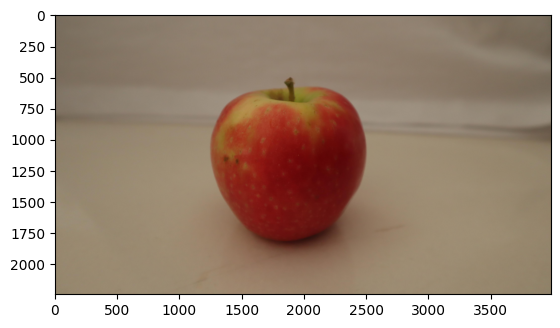

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
train_data = ImageDataGenerator().flow_from_directory(train_files_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path, target_size = (224,224))

Found 245 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [ ]:
NumberOfAppleTypes = 2

In [ ]:
vgg = VGG16()

553467096/553467096 [==============================] - 12s 0us/step


In [ ]:
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.src.engine.input_layer.InputLayer object at 0x7bb809b60430>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb8040ec640>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb807adf6a0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7bb807adeec0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb807ade200>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb807adff40>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7bb807add570>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb807ade170>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb807adf2b0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb809b60580>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7bb807a65930>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb807a46770>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb809bbae60>, <keras.src.layers.convolutional.co

In [ ]:
vggmodel_layersize_tobe_used = len(vgg_layers) - 1 # VGG16 nın katmanlarından sonuncu layeri yani output layerini çıkartıp yerine boş bi layer ekliycez

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
  model.add(vgg_layers[i])

In [ ]:
for layers in model.layers :
  layers.trainable = False

model.add(Dense(NumberOfAppleTypes , activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [ ]:
batch_size = 4
model.fit_generator(train_data,
                    steps_per_epoch = 400//batch_size,
                    epochs = 3,
                    validation_data = test_data,
                    validation_steps = 200//batch_size)

<ipython-input-16-59db0ecc390a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,


Epoch 1/3
  8/100 [=>............................] - ETA: 31:04 - loss: 1.0326 - accuracy: 0.8449

100/100 [==============================] - 261s 2s/step - loss: 1.0326 - accuracy: 0.8449 - val_loss: 0.0294 - val_accuracy: 1.0000


In [ ]:
img = Image.open("/content/drive/MyDrive/deneme/real-elma.jpg").resize((224,224))

In [ ]:
img = np.array(img)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
print(img.ndim)

3


In [ ]:
img = img.reshape(-1,224,224,3)

In [ ]:
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [ ]:
img = preprocess_input(img)

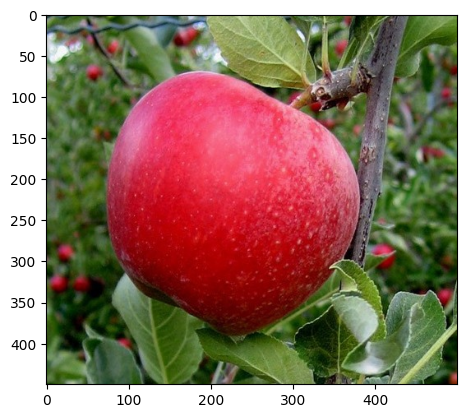

In [ ]:
img_for_display = load_img("/content/drive/MyDrive/deneme/real-elma.jpg")
plt.imshow(img_for_display)
plt.show()

In [ ]:
preds = model.predict(img)

1/1 [==============================] - 1s 1s/step


In [ ]:
preds

array([[0.78424853, 0.2157514 ]], dtype=float32)

In [ ]:
image_classes = ["real","ai"]
result = np.argmax(preds[0])
print(image_classes[result])

real


In [ ]:
print(model.evaluate(test_data, verbose=1))


2/2 [==============================] - 41s 18s/step - loss: 0.0294 - accuracy: 1.0000
[0.029372984543442726, 1.0]
